## Advanced Wormhole Simulator

This script presents an advanced simulation of a Morris-Thorne wormhole, incorporating additional parameters to account for spin and exotic matter effects. It leverages the power of wxPython for GUI elements and VPython for 3D visualization. The simulator allows interactive manipulation of wormhole characteristics, providing a unique educational tool for exploring theoretical physics concepts.

### Detailed Overview

The code consists of several key components:

1. **Advanced Morris-Thorne Metric Function**: This function, `advanced_morris_thorne_metric`, extends the traditional Morris-Thorne metric to include the effects of spin and exotic matter. It computes the components of the metric tensor based on these parameters.

2. **VPython Visualization Function**: The `create_update_wormhole` function uses VPython to create a 3D representation of the wormhole. It updates the visualization based on the metric tensor values computed from the current parameters.

3. **wxPython GUI**: The `WormholeFrame` class builds a graphical user interface using wxPython. It includes sliders allowing real-time interaction and visualization updates. The GUI enables users to adjust parameters like throat size (`b0`), scalar field (`phi0`), spin, and exotic matter influence.

4. **Main Application Function**: The `main` function initializes the wxPython application and displays the GUI window.

This advanced simulator serves as an educational tool, offering a visual and interactive approach to understanding complex astrophysical concepts.

In [ ]:
import wx
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from vpython import canvas, vector, curve

In [ ]:
# Advanced Morris-Thorne Metric Function with additional parameters for spin and exotic matter effects
def advanced_morris_thorne_metric(r, b0, phi0, spin, exotic_factor):
    try:
        b_r = b0 * np.exp(-r**2 / b0**2) + exotic_factor * np.sin(r)
        phi_r = phi0 * np.exp(-r**2 / b0**2)
        omega = spin * r**2  # Spin term
        g_tt = -np.exp(2 * phi_r)
        g_rr = 1 / (1 - b_r/r)
        g_thth = r**2
        g_phiphi = g_thth * (np.sin(np.pi / 2)**2 + omega)
        return g_tt, g_rr, g_thth, g_phiphi
    except Exception as e:
        print(f"Error in metric calculation: {e}")
        return None, None, None, None

# Function to create and update the wormhole visualization in VPython
def create_update_wormhole(canvas, b0, phi0, spin, exotic_factor):
    r_range = np.linspace(-10, 10, 1000)
    _, _, g_thth, g_phiphi = advanced_morris_thorne_metric(r_range, b0, phi0, spin, exotic_factor)

    wormhole_curve = curve(canvas=canvas)
    wormhole_curve.clear()
    for r, gthth, gphiphi in zip(r_range, g_thth, g_phiphi):
        wormhole_curve.append(vector(r, np.sqrt(gthth), np.sqrt(gphiphi)))

# wxPython GUI for interactive wormhole simulation
class WormholeFrame(wx.Frame):
    def __init__(self):
        wx.Frame.__init__(self, None, title="Wormhole Simulator", size=(800,600))
        self.initUI()

    def initUI(self):
        panel = wx.Panel(self)
        self.vp_canvas = canvas(parent=panel, pos=(260, 20), width=500, height=500)
        
        # Sliders for various parameters
        self.b0_slider = wx.Slider(panel, value=1, minValue=1, maxValue=10, pos=(10, 10), size=(250, -1), style=wx.SL_HORIZONTAL)
        self.phi0_slider = wx.Slider(panel, value=0, minValue=0, maxValue=10, pos=(10, 50), size=(250, -1), style=wx.SL_HORIZONTAL)
        self.spin_slider = wx.Slider(panel, value=0, minValue=0, maxValue=10, pos=(10, 90), size=(250, -1), style=wx.SL_HORIZONTAL)
        self.exotic_factor_slider = wx.Slider(panel, value=0, minValue=0, maxValue=10, pos=(10, 130), size=(250, -1), style=wx.SL_HORIZONTAL)
        
        # Bind sliders to the update function
        self.b0_slider.Bind(wx.EVT_SLIDER, self.onUpdate)
        self.phi0_slider.Bind(wx.EVT_SLIDER, self.onUpdate)
        self.spin_slider.Bind(wx.EVT_SLIDER, self.onUpdate)
        self.exotic_factor_slider.Bind(wx.EVT_SLIDER, self.onUpdate)

    def onUpdate(self, event):
        b0 = self.b0_slider.GetValue()
        phi0 = self.phi0_slider.GetValue()
        spin = self.spin_slider.GetValue()
        exotic_factor = self.exotic_factor_slider.GetValue()
        create_update_wormhole(self.vp_canvas, b0, phi0, spin, exotic_factor)

# Main Application Function
def main():
    app = wx.App(False)
    frame = WormholeFrame()
    frame.Show()
    app.MainLoop()

if __name__ == "__main__":
    main()

## Morris-Thorne Wormhole Visualization

This code snippet visualizes a Morris-Thorne wormhole, which is a hypothetical topological feature of spacetime. The visualization represents a 'throat' connecting two separate points in spacetime, a characteristic that theoretically allows for travel between them. The shape function and embedding equations are used to plot the wormhole structure.

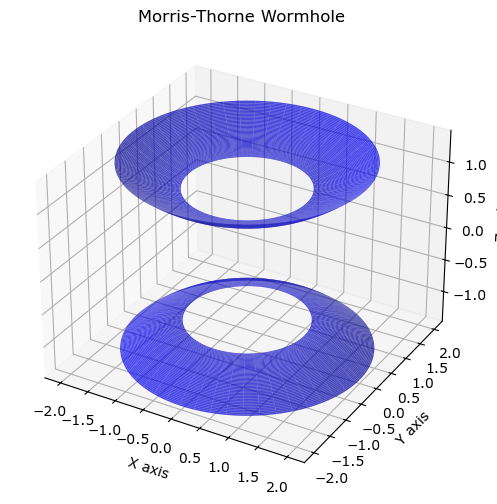

In [3]:
# Wormhole parameters
b0 = 1  # Throat size

# Shape function b(r)
def shape_function(r):
    return b0**2 / r

# Range of r from just above the throat outwards
r = np.linspace(b0 + 0.01, 2 * b0, 500)

# Wormhole embedding function
def z(r):
    return np.sqrt(b0**2 + (r - b0)**2)

# Calculate the embedding function values
z_values = z(r)

# Prepare for 3D plotting
theta = np.linspace(0, 2 * np.pi, 100)
R, Theta = np.meshgrid(r, theta)
X = R * np.cos(Theta)
Y = R * np.sin(Theta)

# Adjust Z to have the same shape as X and Y
Z_upper = np.outer(z_values, np.ones_like(theta)).T  # Transpose the result
Z_lower = -Z_upper  # The lower part of the wormhole

# Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot upper and lower surfaces
ax.plot_surface(X, Y, Z_upper, color='blue', alpha=0.7)
ax.plot_surface(X, Y, Z_lower, color='blue', alpha=0.7)

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('Morris-Thorne Wormhole')

plt.show()

## Kerr Black Hole: Event Horizon and Ergosphere Visualization

This Python code plots the event horizon and ergosphere of a Kerr black hole. The event horizon is the boundary beyond which nothing can escape from the black hole, and the ergosphere is a region outside the event horizon where objects cannot remain stationary. The ergosphere's shape is affected by the black hole's rotation and allows for the possibility of extracting energy from the black hole.

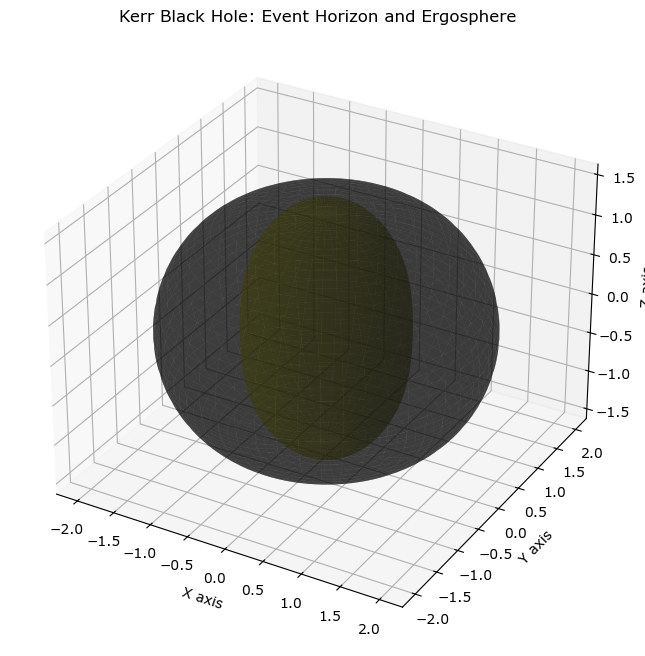

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants
G = M = 1  # Set G = M = 1 for simplicity
a = 0.9    # Spin parameter, |a| <= M

# Functions to compute the radius of the event horizon and ergosphere
def event_horizon(theta, a):
    return 1 + np.sqrt(1 - a**2 * np.cos(theta)**2)

def ergosphere(theta, a):
    return 2 - np.sqrt(1 - a**2 * np.cos(theta)**2)  # Correct formula for ergosphere

# Generate theta and phi values
theta = np.linspace(0, np.pi, 100)
phi = np.linspace(0, 2 * np.pi, 100)
Theta, Phi = np.meshgrid(theta, phi)

# Compute radii
R_horizon = event_horizon(Theta, a)
R_ergo = ergosphere(Theta, a)

# Convert to Cartesian coordinates for plotting
X_horizon = R_horizon * np.sin(Theta) * np.cos(Phi)
Y_horizon = R_horizon * np.sin(Theta) * np.sin(Phi)
Z_horizon = R_horizon * np.cos(Theta)

X_ergo = R_ergo * np.sin(Theta) * np.cos(Phi)
Y_ergo = R_ergo * np.sin(Theta) * np.sin(Phi)
Z_ergo = R_ergo * np.cos(Theta)

# Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Event Horizon
ax.plot_surface(X_horizon, Y_horizon, Z_horizon, color='black', alpha=0.5, label='Event Horizon')
# Ergosphere
ax.plot_surface(X_ergo, Y_ergo, Z_ergo, color='yellow', alpha=0.3, label='Ergosphere')  # Changed color for visibility

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('Kerr Black Hole: Event Horizon and Ergosphere')

plt.show()